In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

In [3]:
reg.coef_

array([1., 2.])

In [2]:
df = pd.read_csv("finalized_players.csv")
df

,Player Name,Pos,Squad,League,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,...,Off,Crs,PKcon,OG,Recov,Won,Lost,Won%,Season,Rating
0,Max Aarons,DF,Bournemouth,Premier League,13.7,29,19,20,7,2,...,2,13,1,0,75,5,11,31.3,2023-2024,6.25
1,Yunis Abdelhamid,DF,Reims,Ligue 1,30.9,64,35,36,23,5,...,0,3,0,1,149,61,37,62.2,2023-2024,6.77
2,Salis Abdul Samed,MF,Lens,Ligue 1,16.9,21,14,8,10,3,...,0,3,3,0,89,2,7,22.2,2023-2024,6.22
3,Laurent Abergel,MF,Lorient,Ligue 1,31.8,85,52,43,34,8,...,1,34,0,0,226,15,14,51.7,2023-2024,6.91
4,Abner,DF,Betis,La Liga,15.6,25,19,15,9,1,...,2,26,1,0,79,14,10,58.3,2023-2024,6.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,Nadir Zortea,"DF,MF",Salernitana,Serie A,15.7,21,15,9,7,5,...,0,85,0,0,72,8,17,32.0,2021-2022,6.36
3648,Kurt Zouma,DF,West Ham,Premier League,23.1,11,6,8,3,0,...,0,1,0,1,92,50,31,61.7,2021-2022,6.74
3649,Igor Zubeldia,DF,Real Sociedad,La Liga,18.3,20,10,12,8,0,...,1,4,1,0,90,41,34,54.7,2021-2022,6.41
3650,Martín Zubimendi,MF,Real Sociedad,La Liga,28.8,52,25,19,30,3,...,3,2,0,0,139,63,24,72.4,2021-2022,6.76


In [8]:
# Encode the target variable (Pos)
label_encoder = LabelEncoder()
df['Pos'] = label_encoder.fit_transform(df['Pos'])

# Define features (X) and target variable (y)
X = df.drop(columns=['Pos', 'Player Name', 'Squad', 'League', 'Season'])  # Drop target column
y = df['Pos']  # Target variable

# Handle missing values (fill with mean for simplicity)
X.fillna(X.mean(), inplace=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.2f}')


Classification Accuracy: 0.87


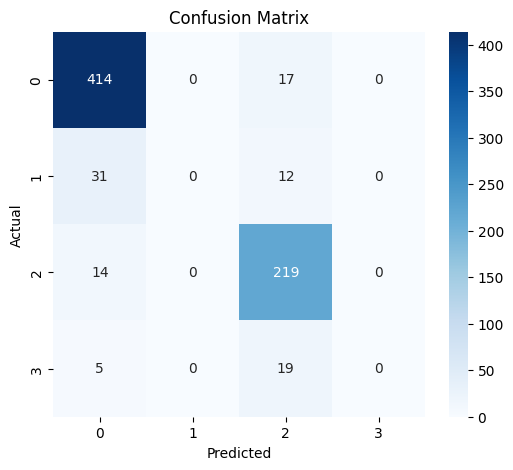

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
X.iloc[:, 10:30]

,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Rk.1,CrdY,CrdR,2CrdY,Fls,Off,Crs,Int.1,TklW.1,PKcon,OG,Recov
0,14,9,5,4,8,37,27,0,1,1,0,0,12,2,13,8,19,1,0,75
1,0,2,0,2,0,2,0,0,3,0,0,0,6,0,0,0,2,0,0,5
2,19,51,32,19,39,103,109,2,5,5,0,0,26,0,3,39,35,0,1,149
3,10,12,1,11,12,33,18,0,6,2,0,0,34,0,3,12,14,3,0,89
4,1,0,0,0,0,0,4,0,7,0,0,0,1,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,7,28,19,9,32,64,97,3,2845,11,1,0,43,0,3,32,25,1,0,156
1602,19,33,9,24,37,86,54,0,2846,5,0,0,36,0,7,37,27,0,0,169
1603,10,5,1,4,6,21,11,0,2847,4,0,0,19,2,6,6,6,0,0,37
1604,41,23,1,22,15,64,5,0,2849,2,0,0,30,3,77,15,17,0,0,158


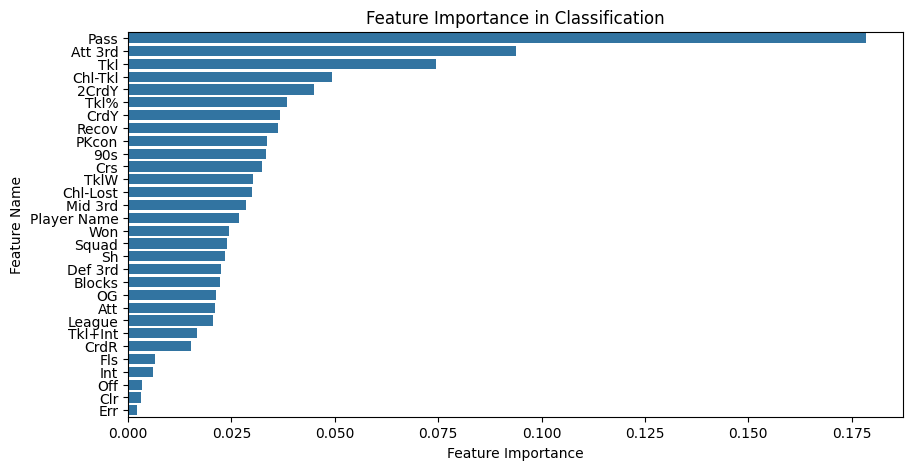

In [10]:
# Get feature importance
feature_importances = clf.feature_importances_
feature_names = df.drop(columns=['Pos']).columns  # Get feature names
# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[sorted_indices], y=[feature_names[i] for i in sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Classification")
plt.show()


In [24]:
ov = df.dropna()
X = ov.drop(columns=["Won%", "Rk", "Pos", "Pos.1"])  # Drop non-numeric or irrelevant columns
y = ov["Won%"]
print(df)

# Handling missing values (if necessary)
#X = X.fillna(0)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

        Rk  Pos   90s  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Tkl.1  Att  ...  \
0        1    0  13.7   29    19       20        7        2     20   34  ...   
1        3    2   1.1    2     2        1        1        0      1    1  ...   
2        5    0  30.9   64    35       36       23        5     26   45  ...   
3        6    2  16.9   21    14        8       10        3      8   18  ...   
4        7    0   2.0    0     0        0        0        0      0    1  ...   
...    ...  ...   ...  ...   ...      ...      ...      ...    ...  ...  ...   
1601  2845    0  28.0   32    25       20       10        2     19   26  ...   
1602  2846    2  29.5   49    27       18       29        2     23   42  ...   
1603  2847    2   9.6   15     6        5        8        2      5   15  ...   
1604  2849    2  34.3   49    17       18       21       10     17   58  ...   
1605  2852    2  12.7   23    12        8       12        3     11   26  ...   

      Off  Crs  Int.1  TklW.1  PKcon  O

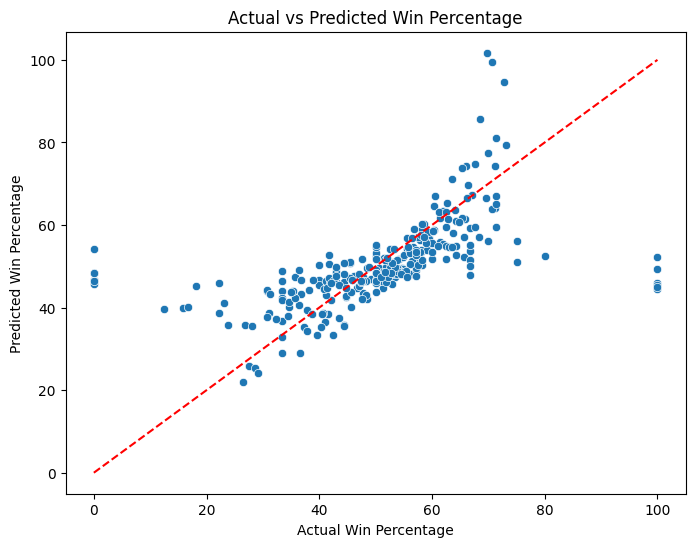

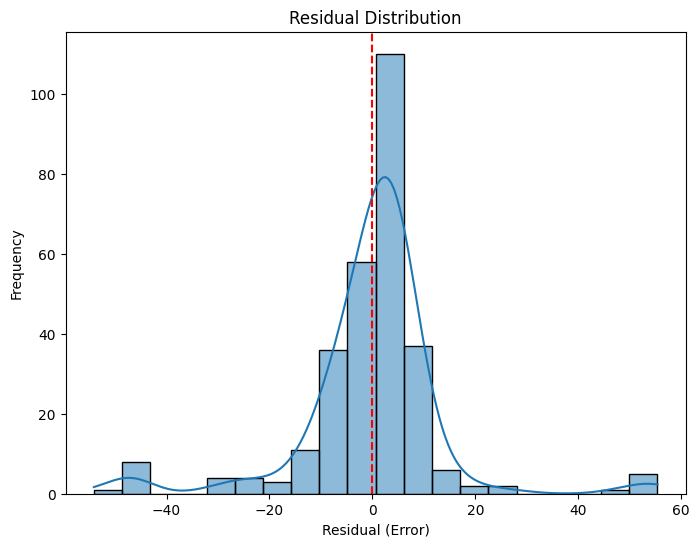

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal 45-degree line
plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
plt.title("Actual vs Predicted Win Percentage")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


Quadratic Regression (Degree 2)
Mean Squared Error: 240.51
R² Score: 0.12


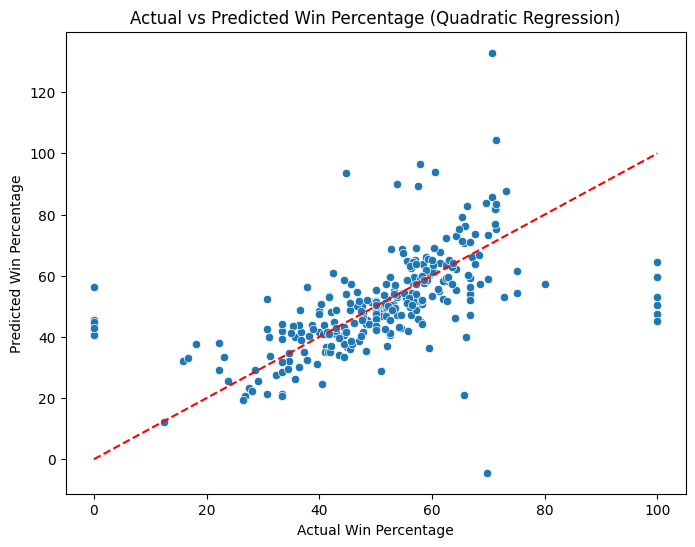

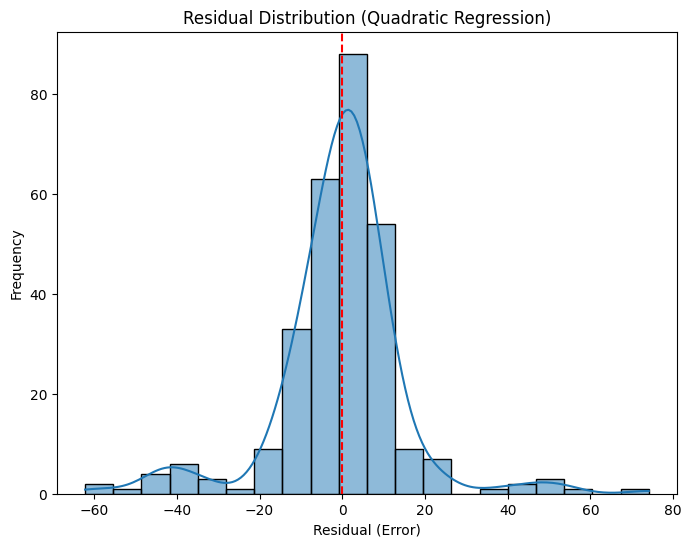

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Define a pipeline that applies quadratic feature transformation and then fits a linear model
quad_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
quad_model.fit(X_train, y_train)

# Predict
y_quad_pred = quad_model.predict(X_test)

# Evaluate performance
mse_quad = mean_squared_error(y_test, y_quad_pred)
r2_quad = r2_score(y_test, y_quad_pred)

print("Quadratic Regression (Degree 2)")
print(f"Mean Squared Error: {mse_quad:.2f}")
print(f"R² Score: {r2_quad:.2f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_quad_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal 45-degree line
plt.xlabel("Actual Win Percentage")
plt.ylabel("Predicted Win Percentage")
plt.title("Actual vs Predicted Win Percentage (Quadratic Regression)")
plt.show()

# Residual plot
residuals_quad = y_test - y_quad_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals_quad, bins=20, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residual Distribution (Quadratic Regression)")
plt.show()


Linear Regression -> MSE: 190.63, R²: 0.31
Quadratic Regression (Poly 2) -> MSE: 240.51, R²: 0.12
Decision Tree -> MSE: 71.85, R²: 0.74
Random Forest -> MSE: 2.54, R²: 0.99
Gradient Boosting -> MSE: 2.30, R²: 0.99
SVR (RBF Kernel) -> MSE: 269.35, R²: 0.02
Neural Network (MLP) -> MSE: 283.84, R²: -0.03


C:\Users\qrJos\AppData\Local\Temp\ipykernel_41916\1914259309.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_scores, y=model_names, palette="viridis")


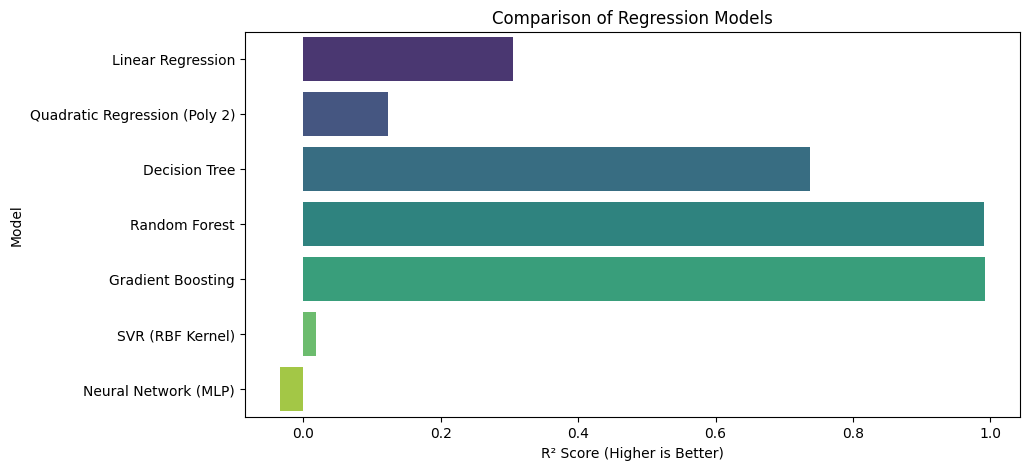

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Quadratic Regression (Poly 2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR (RBF Kernel)": SVR(kernel="rbf", C=1.0, epsilon=0.1),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name} -> MSE: {mse:.2f}, R²: {r2:.2f}")

# Visualize results
plt.figure(figsize=(10, 5))
model_names = list(results.keys())
r2_scores = [results[m][1] for m in model_names]

sns.barplot(x=r2_scores, y=model_names, palette="viridis")
plt.xlabel("R² Score (Higher is Better)")
plt.ylabel("Model")
plt.title("Comparison of Regression Models")
plt.show()


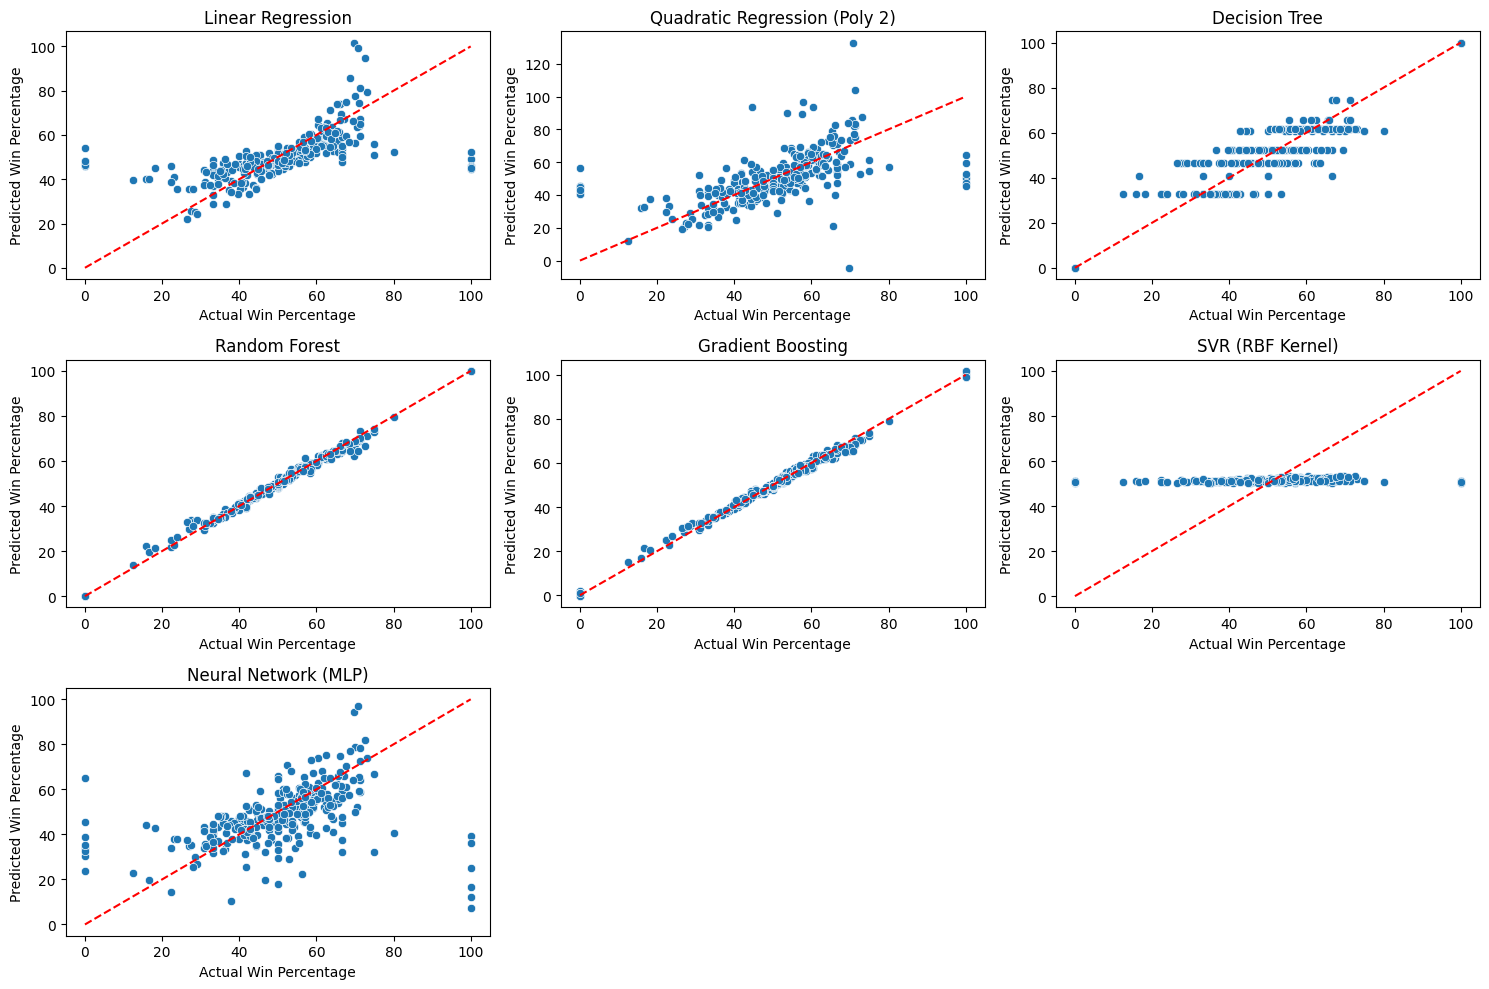

In [33]:
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items()):
    # Predict using the trained model
    y_pred = model.predict(X_test)
    
    # Create subplot for each model
    plt.subplot(3, 3, i + 1)  # Adjust grid size based on number of models
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal 45-degree line
    plt.xlabel("Actual Win Percentage")
    plt.ylabel("Predicted Win Percentage")
    plt.title(f"{name}")
    
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
from datetime import datetime
year = datetime.now().year % 100
collection = []
for i in range(1):
    url_df = 'https://fbref.com/en/comps/Big5/20' + str(year - 1) + '-20' + str(year) + '/defense/players/20' + str(year - 1) + '-20' + str(year) + '-Big-5-European-Leagues-Stats'
    df = pd.read_html(url_df)
    df = df[0]
    df.columns = df.columns.droplevel(0)
    df = df.loc[df.groupby("Player")["90s"].idxmax()]
    collection.append(df)
    year -= 1

df = pd.concat(collection, ignore_index=True)

In [3]:
df = df[df["Pos"].str.contains("DF", na=False)]

In [4]:
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
1,591,Aaron Cresswell,eng ENG,DF,West Ham,eng Premier League,35-067,1989,3.3,3,...,100.0,0,4,1,3,2,5,11,0,Matches
4,2590,Aaron Wan-Bissaka,eng ENG,DF,West Ham,eng Premier League,27-086,1997,23.0,43,...,72.2,5,24,7,17,44,87,77,0,Matches
5,1544,Aarón Martín,es ESP,DF,Genoa,it Serie A,27-304,1997,23.2,53,...,67.6,12,27,9,18,14,67,49,1,Matches
6,2391,Abakar Sylla,ci CIV,DF,Strasbourg,fr Ligue 1,22-057,2002,8.1,22,...,92.3,1,14,7,7,8,30,41,0,Matches
9,17,Abdel Abqar,ma MAR,DF,Alavés,es La Liga,25-347,1999,20.5,27,...,58.3,10,19,12,7,34,61,106,1,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2547,1886,Ángel Ortíz,es ESP,DF,Betis,es La Liga,20-210,2004,3.8,10,...,40.0,9,6,0,6,5,15,7,0,Matches
2548,1646,Éder Militão,br BRA,DF,Real Madrid,es La Liga,27-033,1998,10.4,19,...,58.3,5,13,8,5,12,31,35,0,Matches
2550,1656,Óscar Mingueza,es ESP,"MF,DF",Celta Vigo,es La Liga,25-283,1999,18.1,21,...,39.5,26,16,4,12,11,32,23,3,Matches
2555,1528,Óscar de Marcos,es ESP,DF,Athletic Club,es La Liga,35-312,1989,12.7,25,...,59.3,11,12,1,11,12,37,26,0,Matches


In [6]:
df.columns = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Chl', 'Att', 'Chl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',
       'Matches']

In [30]:
big_df = df

In [27]:
df = df[df["Pos"].str.contains("DF", na=False)]
df = df.loc[df.groupby("Player")["90s"].idxmax()]

In [35]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by player and calculate the mean for the numeric columns
averaged_stats = df[numeric_columns].groupby(df['Player']).mean().reset_index()


In [37]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Group by player and calculate the mean for numeric columns
averaged_stats = df[numeric_columns].groupby(df['Player']).mean().reset_index()

# Now, the player names will be included as a column in the averaged_stats DataFrame


In [38]:
averaged_stats

,Player
0,Aaron Connolly
1,Aaron Cresswell
2,Aaron Hickey
3,Aaron Leya Iseka
4,Aaron Ramsdale
...,...
2694,Łukasz Fabiański
2695,Łukasz Piszczek
2696,Łukasz Skorupski
2697,Šime Vrsaljko


C:\Users\qrJos\AppData\Local\Temp\ipykernel_21872\2587220037.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)
C:\Users\qrJos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\qrJos\AppData\Local\Temp\ipykernel_21872\2587220037.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

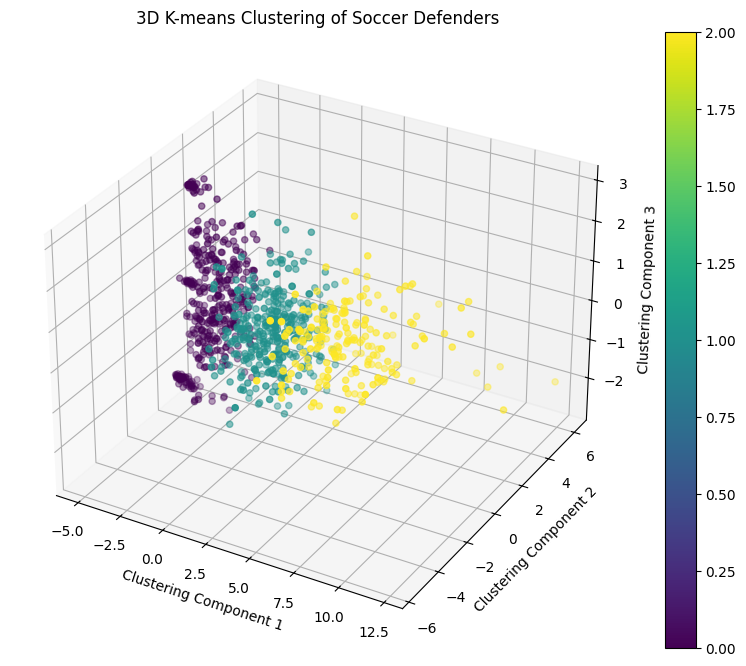

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the features for each category based on your column mappings
high_positive_features = ['TklW', 'Chl%', 'Def 3rd', 'Int', 'Blocks', 'Pass']
high_negative_features = ['Err']
mid_positive_features = ['Mid 3rd', 'Att', 'Tkl', 'Blocks']
mid_negative_features = ['Lost']
low_positive_features = ['Clr', 'Att 3rd', '90s', 'Tkl+Int', 'Tkl']

feature_columns = (high_positive_features + high_negative_features +
                   mid_positive_features + mid_negative_features +
                   low_positive_features)

# Combine all the feature columns
feature_columns = (high_positive_features + high_negative_features +
                   mid_positive_features + mid_negative_features +
                   low_positive_features)

# Select the relevant columns from the DataFrame
df_selected = df[feature_columns]

# Drop rows with missing values (or handle them differently if needed)
df_selected.dropna(inplace=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Apply K-means clustering (you can experiment with the number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)  # For example, 3 clusters
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

# Apply PCA to reduce to 3 dimensions for visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Now plot the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters in 3D
scatter = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df_selected['Cluster'], cmap='viridis')

# Label the axes
ax.set_xlabel('Clustering Component 1')
ax.set_ylabel('Clustering Component 2')
ax.set_zlabel('Clustering Component 3')

# Title
ax.set_title('3D K-means Clustering of Soccer Defenders')

# Add a color bar to show cluster assignments
fig.colorbar(scatter)

plt.show()